In [3]:
# convert to lower case
!sh to_lower_case

In [2]:
# Copies wav files from TIMIT dataset, creates test and train meta data
execfile("prepare_wav.py")

In [3]:
# Executes mfcc extraction by using Hcopy on files from test.csv and train.csv
execfile("prepare_mfcc.py")

Train
Progress: [################################################# ] 100.0% Test
Progress: [################################################# ] 99.9%


In [4]:
# Prerares train, val, test sets and stores them in hdf5 files
from subprocess import call
import shlex
#call(shlex.split("python prepare_db.py --train=hdf5 --val=hdf5 --test=hdf5"))
!python prepare_db.py --train=hdf5 --val=hdf5 --test=hdf5

Num speakers in train set: 462
Num speakers in validation set: 462

- Preparing train (hdf5)
Progress: [################################################# ] 100.0% 
 Total number of objects  973287
[[[  3.53973292e-06  -5.75482488e-07   1.18943183e-06 ...,  -2.64997713e-08
    -1.40948835e-08  -2.23133050e-08]
  [  4.10319535e-06  -1.31349452e-06   3.10913447e-06 ...,  -1.28835449e-08
     1.24146871e-08   5.23067900e-09]
  [ -2.15331929e-05  -5.52301526e-06   3.49258062e-06 ...,  -1.85092262e-08
    -1.41588492e-08   3.42291884e-09]
  ..., 
  [  2.59284116e-06  -5.35876234e-06   5.54896360e-07 ...,   2.68392277e-08
     1.51374806e-08   1.22687052e-08]
  [ -7.28291252e-06  -7.03976468e-07  -2.42473437e-08 ...,   6.69004185e-09
    -2.43971048e-08   2.26688068e-09]
  [ -8.69399082e-06  -2.98150326e-06  -1.38926907e-07 ...,  -2.20963301e-08
    -3.48024614e-08  -2.03743298e-08]]]
dumping <type 'dict'> to file <HDF5 file "data.hdf5" (mode r+)>

- Preparing validation (hdf5)
Progress: [###

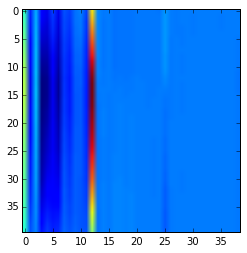

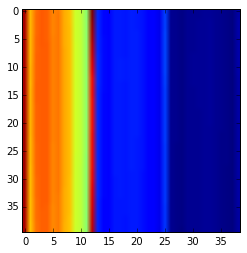

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%run set_up.py


mean = np.load(timit_folder_path + '/timit_id/db/sa/mean.npy')
plt.imshow(mean.reshape(-1,39))
plt.show()
std = np.load(timit_folder_path + '/timit_id/db/sa/std.npy')
plt.imshow(std.reshape(-1,39))
plt.show()

In [47]:
def create_binaryproto(array, name, shape):
    blob = caffe_pb2.BlobProto()
    blob.channels, blob.width, blob.height = shape
    blob.num = 1
    blob.data.extend(array.tolist())

    binaryproto_file = open('%s.binaryproto' % name, 'wb')
    binaryproto_file.write(blob.SerializeToString())
    binaryproto_file.close()

In [49]:
def mean_(mean, binaryproto = True):
    if binaryproto:
    from caffe.proto import caffe_pb2
    from caffe.io import blobproto_to_array

    # Transform a protoblob to a numpy array
    blob = caffe_pb2.BlobProto()
    data = open(mean, "rb").read()
    blob.ParseFromString(data)
    print len(blob.data)
    print blob.num
    nparray = blobproto_to_array(blob)
    else:
    np.load(mean)

    return nparray

In [16]:
mean_('mean.binaryproto').shape

NameError: name 'mean_' is not defined